<a href="https://colab.research.google.com/github/HanifCahyo/Klasifikasi_Naive_bayes/blob/main/Klasifikasi_Data_dengan_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [125]:
dataset =  pd.read_csv("DataKemiskinan4.csv")
x = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

In [128]:
print(x)

[[ 1  5]
 [ 1  3]
 [ 1  8]
 ...
 [ 3 28]
 [ 3 28]
 [ 3 21]]


In [127]:
print(y)

['No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'No'
 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No'
 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No'
 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No'
 'No' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No'
 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'

In [129]:
from sklearn.preprocessing import (
    LabelEncoder,
)  # LabelEncoder untuk mengubah data kategorikal menjadi numerikal

le = LabelEncoder()  # LabelEncoder untuk mengubah data kategorikal menjadi numerikal
y = le.fit_transform(y)  # Mengubah data kategorikal menjadi numerikal
print(y)  # Menampilkan data y

[0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 

In [130]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 0)

In [131]:
print(x_train)

[[ 2 15]
 [ 1  3]
 [ 3 21]
 [ 3 24]
 [ 2 14]
 [ 3 21]
 [ 2 18]
 [ 1  6]
 [ 1  7]
 [ 2 11]
 [ 1  1]
 [ 1  9]
 [ 2 14]
 [ 1  1]
 [ 1  7]
 [ 2 14]
 [ 2 20]
 [ 2 19]
 [ 2 17]
 [ 1  6]
 [ 1  1]
 [ 1  2]
 [ 1  7]
 [ 1  5]
 [ 2 17]
 [ 2 20]
 [ 1  8]
 [ 2 13]
 [ 2 11]
 [ 1  3]
 [ 3 24]
 [ 2 12]
 [ 2 18]
 [ 3 22]
 [ 2 12]
 [ 1  4]
 [ 3 21]
 [ 1  8]
 [ 1  1]
 [ 2 17]
 [ 1 10]
 [ 2 12]
 [ 3 21]
 [ 3 23]
 [ 3 27]
 [ 2 19]
 [ 2 15]
 [ 1  4]
 [ 1  4]
 [ 1  3]
 [ 2 12]
 [ 1  1]
 [ 1  4]
 [ 1  4]
 [ 1  6]
 [ 2 14]
 [ 1  6]
 [ 3 27]
 [ 2 13]
 [ 3 27]
 [ 1  5]
 [ 1  4]
 [ 1  4]
 [ 1  8]
 [ 1  5]
 [ 1  8]
 [ 1  7]
 [ 2 19]
 [ 1  1]
 [ 2 18]
 [ 3 21]
 [ 1  6]
 [ 1  5]
 [ 2 12]
 [ 1  9]
 [ 1  8]
 [ 2 15]
 [ 1  8]
 [ 1  3]
 [ 1  8]
 [ 1  4]
 [ 1  1]
 [ 2 18]
 [ 2 19]
 [ 1  9]
 [ 1  9]
 [ 2 12]
 [ 2 18]
 [ 3 29]
 [ 2 15]
 [ 3 28]
 [ 1  8]
 [ 3 21]
 [ 3 28]
 [ 1  9]
 [ 1  3]
 [ 3 29]
 [ 3 28]
 [ 3 27]
 [ 2 19]
 [ 3 29]
 [ 3 23]
 [ 1  6]
 [ 3 29]
 [ 2 14]
 [ 3 28]
 [ 2 17]
 [ 2 19]
 [ 2 19]
 [ 3 28]
 [ 1  3]
 

In [132]:
print(x_test)

[[ 1  1]
 [ 3 29]
 [ 1  2]
 [ 1  5]
 [ 1  5]
 [ 1  5]
 [ 3 23]
 [ 1  3]
 [ 3 26]
 [ 2 15]
 [ 2 20]
 [ 3 23]
 [ 1  6]
 [ 2 16]
 [ 2 17]
 [ 2 20]
 [ 3 25]
 [ 2 14]
 [ 3 27]
 [ 2 15]
 [ 2 15]
 [ 3 22]
 [ 3 26]
 [ 2 14]
 [ 2 13]
 [ 1  4]
 [ 3 27]
 [ 1  7]
 [ 3 29]
 [ 3 21]
 [ 1  8]
 [ 2 17]
 [ 1  6]
 [ 1  9]
 [ 1  6]
 [ 1  6]
 [ 2 15]
 [ 3 24]
 [ 1  6]
 [ 2 13]
 [ 3 22]
 [ 3 29]
 [ 1  5]
 [ 3 23]
 [ 1  2]
 [ 1  5]
 [ 2 15]
 [ 1  7]
 [ 3 22]
 [ 1  4]
 [ 3 30]
 [ 1  8]
 [ 3 27]
 [ 3 21]
 [ 2 16]
 [ 2 17]
 [ 3 27]
 [ 3 21]
 [ 3 28]
 [ 3 24]
 [ 2 13]
 [ 2 12]
 [ 1  8]
 [ 1  2]
 [ 2 18]
 [ 1  7]
 [ 1  4]
 [ 2 17]
 [ 1  6]
 [ 1  2]
 [ 2 18]
 [ 2 18]
 [ 1  7]
 [ 1  5]
 [ 1  5]
 [ 3 24]
 [ 1  6]
 [ 2 18]
 [ 1  9]
 [ 2 14]
 [ 1  2]
 [ 1  5]
 [ 2 12]
 [ 2 12]
 [ 2 19]
 [ 3 24]
 [ 3 21]
 [ 2 15]
 [ 2 19]
 [ 2 14]
 [ 2 14]
 [ 2 15]
 [ 2 20]
 [ 3 21]
 [ 3 21]
 [ 2 17]
 [ 2 20]
 [ 1  5]
 [ 1  3]
 [ 2 13]
 [ 1  8]
 [ 1  9]
 [ 2 13]
 [ 2 14]
 [ 3 27]
 [ 2 14]
 [ 1  2]
 [ 1  9]
 [ 2 11]
 [ 2 17]
 [ 1  4]
 

In [134]:
print(y_train)

[0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0
 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


In [135]:
print(y_test)

[0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0]


In [136]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [137]:
print(x_train)

[[ 0.21410432  0.15992231]
 [-1.04299392 -1.23854728]
 [ 1.47120257  0.85915711]
 [ 1.47120257  1.20877451]
 [ 0.21410432  0.04338318]
 [ 1.47120257  0.85915711]
 [ 0.21410432  0.50953971]
 [-1.04299392 -0.88892988]
 [-1.04299392 -0.77239075]
 [ 0.21410432 -0.30623422]
 [-1.04299392 -1.47162555]
 [-1.04299392 -0.53931248]
 [ 0.21410432  0.04338318]
 [-1.04299392 -1.47162555]
 [-1.04299392 -0.77239075]
 [ 0.21410432  0.04338318]
 [ 0.21410432  0.74261798]
 [ 0.21410432  0.62607885]
 [ 0.21410432  0.39300058]
 [-1.04299392 -0.88892988]
 [-1.04299392 -1.47162555]
 [-1.04299392 -1.35508642]
 [-1.04299392 -0.77239075]
 [-1.04299392 -1.00546902]
 [ 0.21410432  0.39300058]
 [ 0.21410432  0.74261798]
 [-1.04299392 -0.65585162]
 [ 0.21410432 -0.07315595]
 [ 0.21410432 -0.30623422]
 [-1.04299392 -1.23854728]
 [ 1.47120257  1.20877451]
 [ 0.21410432 -0.18969509]
 [ 0.21410432  0.50953971]
 [ 1.47120257  0.97569625]
 [ 0.21410432 -0.18969509]
 [-1.04299392 -1.12200815]
 [ 1.47120257  0.85915711]
 

In [138]:
print(x_test)

[[-1.04299392 -1.47162555]
 [ 1.47120257  1.79147018]
 [-1.04299392 -1.35508642]
 [-1.04299392 -1.00546902]
 [-1.04299392 -1.00546902]
 [-1.04299392 -1.00546902]
 [ 1.47120257  1.09223538]
 [-1.04299392 -1.23854728]
 [ 1.47120257  1.44185278]
 [ 0.21410432  0.15992231]
 [ 0.21410432  0.74261798]
 [ 1.47120257  1.09223538]
 [-1.04299392 -0.88892988]
 [ 0.21410432  0.27646145]
 [ 0.21410432  0.39300058]
 [ 0.21410432  0.74261798]
 [ 1.47120257  1.32531365]
 [ 0.21410432  0.04338318]
 [ 1.47120257  1.55839191]
 [ 0.21410432  0.15992231]
 [ 0.21410432  0.15992231]
 [ 1.47120257  0.97569625]
 [ 1.47120257  1.44185278]
 [ 0.21410432  0.04338318]
 [ 0.21410432 -0.07315595]
 [-1.04299392 -1.12200815]
 [ 1.47120257  1.55839191]
 [-1.04299392 -0.77239075]
 [ 1.47120257  1.79147018]
 [ 1.47120257  0.85915711]
 [-1.04299392 -0.65585162]
 [ 0.21410432  0.39300058]
 [-1.04299392 -0.88892988]
 [-1.04299392 -0.53931248]
 [-1.04299392 -0.88892988]
 [-1.04299392 -0.88892988]
 [ 0.21410432  0.15992231]
 

In [139]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [140]:
y_pred = classifier.predict(x_test)

In [141]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[123   0]
 [ 15   0]]


Membentuk gambar grafik klasifikasi untuk data training

<ipython-input-144-0026cad71147>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1],


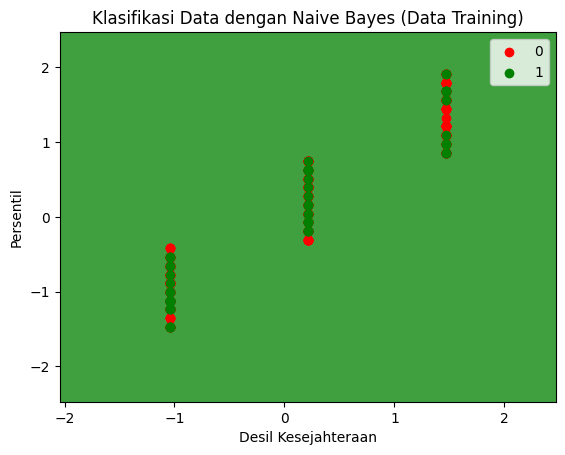

In [144]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() +1, step=0.01),
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 0].max() +1, step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('green', 'red')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan Naive Bayes (Data Training)')
plt.xlabel('Desil Kesejahteraan')
plt.ylabel('Persentil')
plt.legend()
plt.show()

Membentuk gambar data klasifikasi untuk data testing

<ipython-input-146-bee1f7ec71cb>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1],


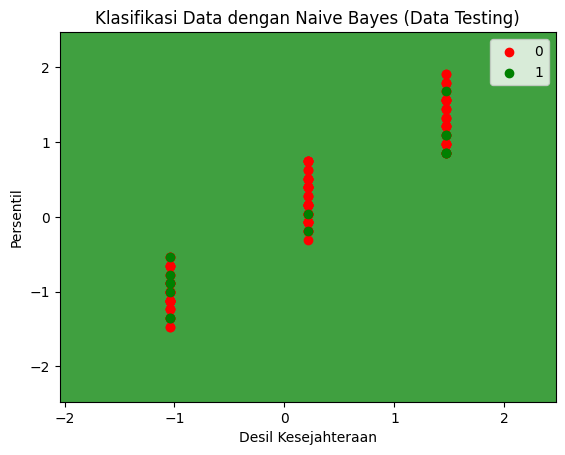

In [146]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() +1, step=0.01),
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 0].max() +1, step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('green', 'red')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan Naive Bayes (Data Testing)')
plt.xlabel('Desil Kesejahteraan')
plt.ylabel('Persentil')
plt.legend()
plt.show()